In [1]:
import tensorflow as tf
import PIL.Image
import numpy as np

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  
  return PIL.Image.fromarray(tensor)

In [2]:
def image_to_tensor(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

  # Resize the image to specific dimensions
  img = tf.image.resize(img, [512, 512])
  img = img[tf.newaxis, :]
  return img

In [13]:
cat_tensor = image_to_tensor('C:/Users/HP/Documents/Python Scripts/Style Transfer/kucing.jpg')
style_tensor = image_to_tensor('C:/Users/HP/Documents/Python Scripts/Style Transfer/style.jpg')

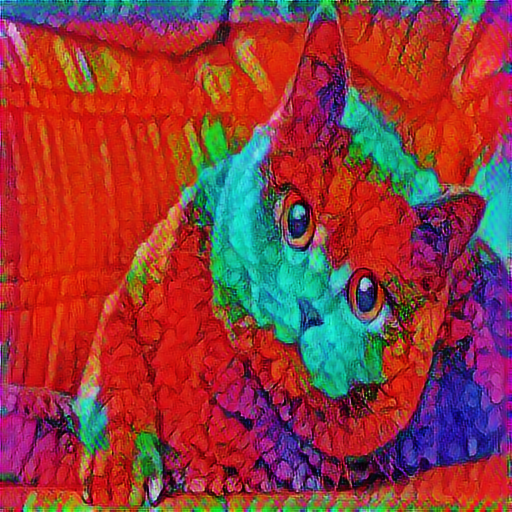

In [15]:
import tensorflow_hub as hub
import time
import functools

hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(cat_tensor), tf.constant(style_tensor))[0]
tensor_to_image(stylized_image)